# Dataset - information

In [1]:
# Exemple : Stochastic Gradient Descent Regressor avec plusieurs variables

#lien : https://www.kaggle.com/datasets/rajacsp/toronto-apartment-price

"""
Bedroom - How many bedrooms available
Bathroom - How many bathrooms available
Den - Whether den is available or not
Address - Location
Lat - Lattitude
Long - Longitude
Price - Apartment Rental price per month in CAD
"""

'\nBedroom - How many bedrooms available\nBathroom - How many bathrooms available\nDen - Whether den is available or not\nAddress - Location\nLat - Lattitude\nLong - Longitude\nPrice - Apartment Rental price per month in CAD\n'

# Importer les bibliothèques

In [20]:
# importer les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# Importer le Dataset

In [3]:
# importer le dataset
dataset = pd.read_csv("dataset_LR_Toronto_apartment_rentals_2018.csv")
dataset

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950.00"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800.00"
...,...,...,...,...,...,...,...
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,"$3,000.00"
1120,1,1.0,0,", oakville L6M3V5 ON, Canada",43.445426,-79.736833,"$1,200.00"
1121,1,1.0,0,"Upper Beaches, Toronto, ON, Canada, M4C 1B4",43.683386,-79.309409,"$1,800.00"
1122,2,1.0,0,", Toronto M5B 2L7 ON, Canada",43.653636,-79.380873,"$2,200.00"


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Bedroom   1124 non-null   int64  
 1   Bathroom  1124 non-null   float64
 2   Den       1124 non-null   int64  
 3   Address   1124 non-null   object 
 4   Lat       1124 non-null   float64
 5   Long      1124 non-null   float64
 6   Price     1124 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 61.6+ KB


In [5]:
dataset.describe()

,Bedroom,Bathroom,Den,Lat,Long
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,1.370107,1.237544,0.153025,43.703532,-79.500326
std,0.553493,0.431997,0.360172,0.692689,1.760654
min,1.000000,1.000000,0.000000,42.985767,-114.082215
25%,1.000000,1.000000,0.000000,43.641355,-79.414319
50%,1.000000,1.000000,0.000000,43.650560,-79.387295
75%,2.000000,1.000000,0.000000,43.666613,-79.377198
max,3.000000,3.000000,1.000000,56.130366,-73.576385


# Visualisation des données

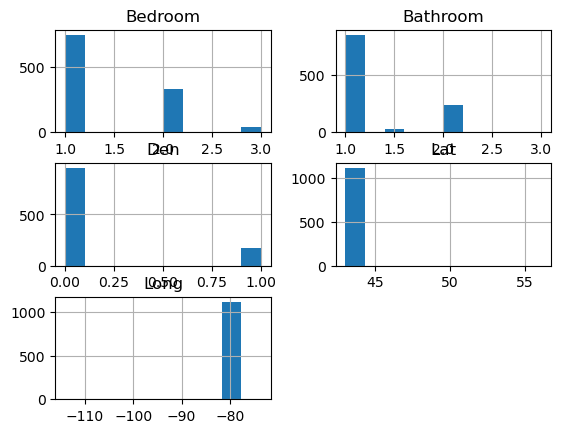

In [6]:
# Mettre le résultat de toutes les colonnes dans un histogramme - matplotlib
dataset.hist()
plt.show()

# Prétraitement

In [7]:
# 1 - Les données manquantes (OK)

In [8]:
# 2 - Régularisation des données
# 2-1 Supprimer le signe '$' depuis la collonne 'Price' et le ''.00'
dataset['house_price'] = dataset['Price'].apply(lambda x:  str(x)[1:6])
dataset

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,house_price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00","2,450"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00","2,150"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950.00","1,950"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00","2,900"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800.00","1,800"
...,...,...,...,...,...,...,...,...
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,"$3,000.00","3,000"
1120,1,1.0,0,", oakville L6M3V5 ON, Canada",43.445426,-79.736833,"$1,200.00","1,200"
1121,1,1.0,0,"Upper Beaches, Toronto, ON, Canada, M4C 1B4",43.683386,-79.309409,"$1,800.00","1,800"
1122,2,1.0,0,", Toronto M5B 2L7 ON, Canada",43.653636,-79.380873,"$2,200.00","2,200"


In [9]:
# 2-2 Supprimer la virgule
dataset['house_price'] = dataset['house_price'].str.replace(',','')
dataset

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,house_price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00",2450
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00",2150
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950.00",1950
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00",2900
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800.00",1800
...,...,...,...,...,...,...,...,...
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,"$3,000.00",3000
1120,1,1.0,0,", oakville L6M3V5 ON, Canada",43.445426,-79.736833,"$1,200.00",1200
1121,1,1.0,0,"Upper Beaches, Toronto, ON, Canada, M4C 1B4",43.683386,-79.309409,"$1,800.00",1800
1122,2,1.0,0,", Toronto M5B 2L7 ON, Canada",43.653636,-79.380873,"$2,200.00",2200


In [10]:
# 3 - La sélection des données : 
# on garde que les colonnes : Bedroom, Bathroom, Den, Price
dataset = dataset.loc[: , ['Bedroom', 'Bathroom', 'Den', 'house_price']]
#dataset = dataset.loc[: , ['Bedroom', 'house_price']]
dataset

,Bedroom,Bathroom,Den,house_price
0,2,2.0,0,2450
1,1,1.0,1,2150
2,1,1.0,0,1950
3,2,2.0,0,2900
4,1,1.0,0,1800
...,...,...,...,...
1119,3,1.0,0,3000
1120,1,1.0,0,1200
1121,1,1.0,0,1800
1122,2,1.0,0,2200


# Apprentissage

In [11]:
# Préciser les X et Y
X = dataset.iloc[:,:-1] # X contient toutes les colonnes sauf la dernière
Y = dataset.iloc[:,-1] # Y présente la dernière colonne

In [12]:
# sélectionner un algorithme (estimateur)
model = SGDRegressor(alpha=0.001,max_iter=1000) 

In [13]:
# slpit dataset (test et train)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (899, 3)
Test set: (225, 3)


Text(0.5, 1.0, 'Test set')

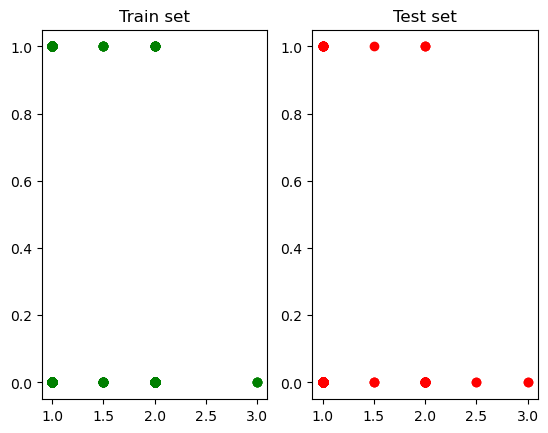

In [14]:
# Visualizer dataset après split
plt.figure()
plt.subplot(121)
plt.scatter(X_train.iloc[:,1], X_train.iloc[:,2], c='green')
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test.iloc[:,1], X_test.iloc[:,2], c='red')
plt.title('Test set')

In [15]:
# entrainer le modèle sur les données X, Y 
model.fit(X_train ,Y_train) #

SGDRegressor(alpha=0.001)

In [16]:
# évaluer le modèle 
model.score(X_test, Y_test)

0.24403325016580035

In [17]:
# utiliser le modèle
prediction = model.predict(X_test)
prediction

array([2488.73800019, 1856.42695478, 2161.55496983, 1856.42695478,
       2793.86601525, 2793.86601525, 3098.9940303 , 1856.42695478,
       1856.42695478, 2793.86601525, 1856.42695478, 2780.43341522,
       3098.9940303 , 2793.86601525, 2793.86601525, 1856.42695478,
       1856.42695478, 1856.42695478, 1856.42695478, 3415.14955301,
       2148.12236981, 1856.42695478, 2793.86601525, 2161.55496983,
       2148.12236981, 1856.42695478, 1856.42695478, 1856.42695478,
       1856.42695478, 2793.86601525, 3731.30507572, 2793.86601525,
       2161.55496983, 2793.86601525, 2793.86601525, 2161.55496983,
       1856.42695478, 1856.42695478, 1856.42695478, 2793.86601525,
       1856.42695478, 1856.42695478, 1856.42695478, 2148.12236981,
       1856.42695478, 2793.86601525, 1856.42695478, 1856.42695478,
       2793.86601525, 2148.12236981, 2793.86601525, 2793.86601525,
       2466.68298489, 1856.42695478, 1856.42695478, 2161.55496983,
       2172.58247749, 1856.42695478, 1856.42695478, 1856.42695

In [18]:
# les paramètres de la fonction :  Theta1
model.coef_ # Theta1, Theta2, Theta3

array([305.12801506, 632.31104542, 291.69541503])

In [19]:
# les paramètres de la fonction :  Theta0
model.intercept_ # Theta0

array([918.9878943])

In [29]:
len(Y_test)

225

In [33]:
len(prediction)

225

In [35]:
print("L’erreur quadratique moyenne (MSE) : ",mean_squared_error(Y_test,prediction))

L’erreur quadratique moyenne (MSE) :  485087.52830468136


In [40]:
print("la racine de l’erreur quadratique moyenne (RMSE) : ",np.sqrt(mean_squared_error(Y_test,prediction)))

la racine de l’erreur quadratique moyenne (RMSE) :  696.4822526846476


In [42]:
rSQ = r2_score(Y_test , prediction)
print("R-squard (R2) : ", rSQ)

R-squard (R2) :  0.24403325016580035
